In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [2]:
df = pd.read_csv('telco_churn.csv')

In [3]:
df = pd.read_csv('telco_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
# Creating X and Y variables
x = df.drop('Churn', axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [6]:
y = df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

__Train Test Split__

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [10]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth =6, min_samples_leaf=8)

In [11]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [12]:
y_pred = model_dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [13]:
model_dt.score(x_test, y_test)

0.7860696517412935

In [14]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.48      0.54       366

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



### Model Performance on Imbalanced Dataset

The model's accuracy is notably low, which is expected given the imbalanced nature of the dataset. In such cases, accuracy is not a reliable metric because it can be misleading. Instead, we should focus on metrics like recall, precision, and F1 score, particularly for the minority class.

Upon examining these metrics, we observe that the precision, recall, and F1 score for Class 1 (churned customers) are significantly low. This indicates that the model is not performing well in identifying the minority class.

To address this issue, we will apply the SMOTEENN technique, which combines SMOTE (Synthetic Minority Over-sampling Technique) for upsampling the minority class and ENN (Edited Nearest Neighbors) for cleaning the data.
N)

In [16]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [17]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [18]:
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth =6, min_samples_leaf=8)

In [19]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9216354344122658
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       530
           1       0.92      0.94      0.93       644

    accuracy                           0.92      1174
   macro avg       0.92      0.92      0.92      1174
weighted avg       0.92      0.92      0.92      1174



In [20]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[477  53]
 [ 39 605]]


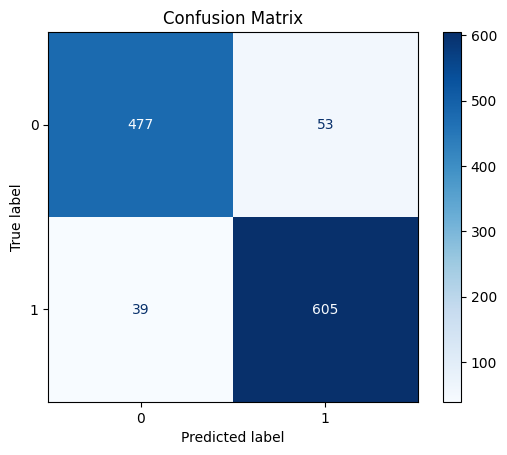

In [21]:
# Displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(yr_test, yr_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt_smote.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Improved Model Performance

The results have significantly improved, with an accuracy of 92%. Additionally, the recall, precision, and F1 score for the minority class have also shown considerable enhancement.

Next, let's experiment with a different classifier to further optimize our model.


## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [26]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [27]:
y_pred=model_rf.predict(x_test)

In [28]:
model_rf.score(x_test,y_test)

0.7967306325515281

In [29]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1041
           1       0.67      0.43      0.53       366

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [30]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [31]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [32]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [33]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [34]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [35]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [36]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.931063829787234
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       504
           1       0.94      0.94      0.94       671

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted avg       0.93      0.93      0.93      1175



### Random Forest Classifier Results

Using the Random Forest classifier, we achieved even better results (93%) compared to the Decision Tree. 

Thus, we will finalize the model created by the Random Forest classifier and save it for future use.


In [38]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[462  42]
 [ 39 632]]


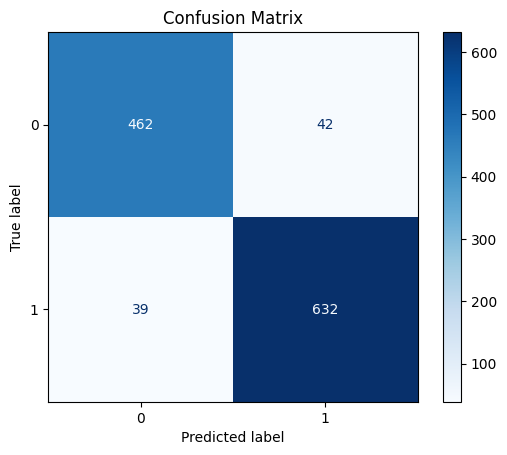

In [39]:
# Displaying the confusion matrix
cm = metrics.confusion_matrix(yr_test1, yr_predict1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf_smote.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Pickling the model

In [41]:
import pickle

In [42]:
filename = 'model_new.sav'

In [43]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [44]:
load_model = pickle.load(open(filename, 'rb'))

In [45]:
load_model.score(xr_test, yr_test)

0.934412265758092